In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

Using TensorFlow backend.


In [2]:
import os

base_dir = r'C:\Users\user\OneDrive - 台灣智園有限公司\文件\＊WG_New_2020_May\新-上開2020\交付物\交付物１：学习数据指标设计报告\6.20前给上开\课程二问卷\课程二 - training dataset'
train_dir = os.path.join(base_dir, 'training_dataset')

# Directory with our training unenthusiastic teaching pictures
train_unenthusiastic_dir = os.path.join(train_dir, 'unenthusiastic')

# Directory with our training enthusiastic teaching pictures
train_enthusiastic_dir = os.path.join(train_dir, 'enthusiastic')

In [3]:
train_unenthusiastic_fnames = os.listdir(train_unenthusiastic_dir)
train_unenthusiastic_fnames.sort()
print(train_unenthusiastic_fnames[:10])

train_enthusiastic_fnames = os.listdir(train_enthusiastic_dir)
print(train_enthusiastic_fnames[:10])

print('total training unenthusiastic images:', len(os.listdir(train_unenthusiastic_dir)))
print('total training enthusiastic images:', len(os.listdir(train_enthusiastic_dir)))

['unenthusiastic1.png', 'unenthusiastic10.png', 'unenthusiastic11.png', 'unenthusiastic12.png', 'unenthusiastic13.png', 'unenthusiastic14.png', 'unenthusiastic15.png', 'unenthusiastic16.png', 'unenthusiastic17.png', 'unenthusiastic18.png']
['enthusiastic1.png', 'enthusiastic10.png', 'enthusiastic11.png', 'enthusiastic12.png', 'enthusiastic13.png', 'enthusiastic14.png', 'enthusiastic15.png', 'enthusiastic16.png', 'enthusiastic17.png', 'enthusiastic18.png']
total training unenthusiastic images: 31
total training enthusiastic images: 42


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

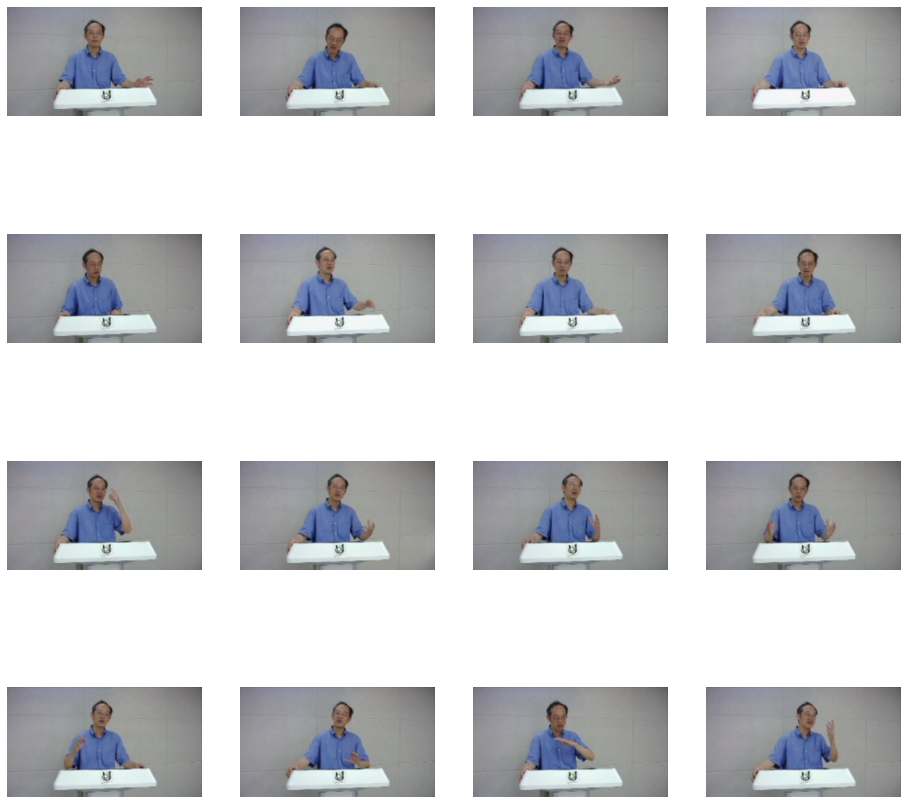

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_unenthusiastic_pix = [os.path.join(train_unenthusiastic_dir, fname) 
                for fname in train_unenthusiastic_fnames[pic_index-8:pic_index]]
next_enthusiastic_pix = [os.path.join(train_enthusiastic_dir, fname) 
                for fname in train_enthusiastic_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_unenthusiastic_pix+next_enthusiastic_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 275X155x3: 275X155 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(275, 275, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [7]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 275, 275, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 273, 273, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 136, 136, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 134, 134, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 67, 67, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 65, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0     

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(275, 275),  # All images will be resized to 275X155
        classes= ['unenthusiastic', 'enthusiastic'],    #0为前者, 1为后者
        batch_size=6,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 73 images belonging to 2 classes.


In [21]:
train_labels = train_generator.classes 
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=13,  # 73 images = batch_size * steps
      epochs=10,
      verbose=2)

  ...
    to  
  ['...']
Train for 13 steps
Epoch 1/10
13/13 - 18s - loss: 0.6321 - acc: 0.8493
Epoch 2/10
13/13 - 15s - loss: 0.4374 - acc: 0.7945
Epoch 3/10
13/13 - 15s - loss: 0.3190 - acc: 0.8630
Epoch 4/10
13/13 - 15s - loss: 0.3484 - acc: 0.8630
Epoch 5/10
13/13 - 15s - loss: 0.1754 - acc: 0.9452
Epoch 6/10
13/13 - 15s - loss: 0.0618 - acc: 0.9863
Epoch 7/10
13/13 - 15s - loss: 0.2182 - acc: 0.8904
Epoch 8/10
13/13 - 15s - loss: 0.1932 - acc: 0.9315
Epoch 9/10
13/13 - 15s - loss: 0.0177 - acc: 1.0000
Epoch 10/10
13/13 - 15s - loss: 0.0117 - acc: 1.0000


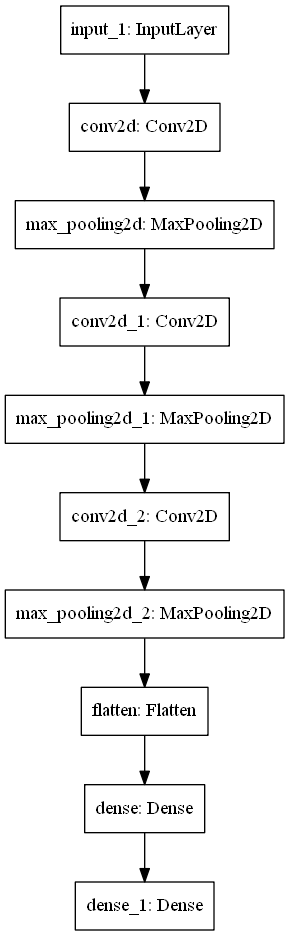

In [23]:
from tensorflow.keras.utils import plot_model
import pydot_ng as pydot

plot_model(model, to_file='model.png')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


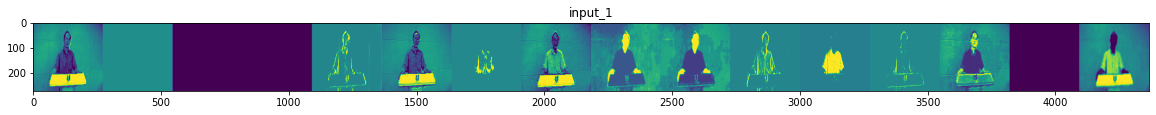

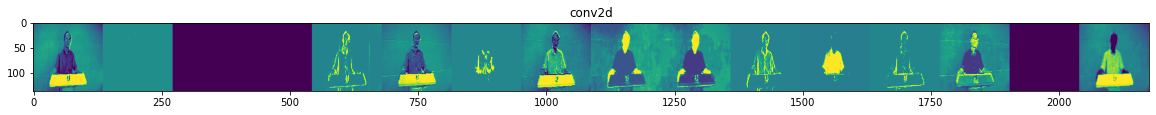

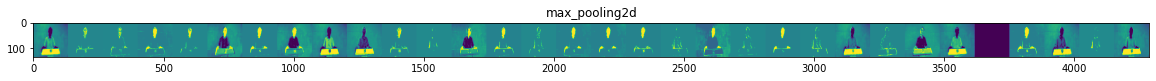

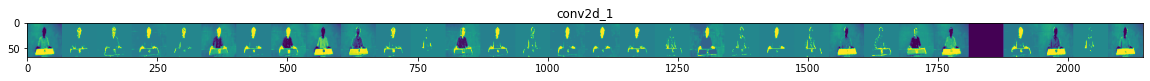

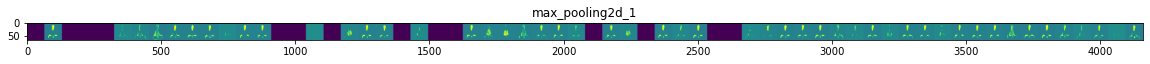

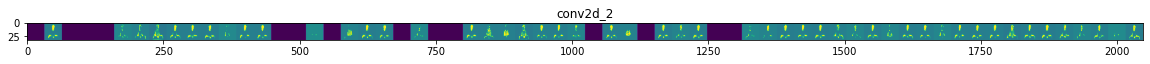

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a unenthusiastic or ununenthusiastic from the training set.
unenthusiastic_img_files = [os.path.join(train_unenthusiastic_dir, f) for f in train_unenthusiastic_fnames]
enthusiastic_img_files = [os.path.join(train_enthusiastic_dir, f) for f in train_enthusiastic_fnames]
img_path = random.choice(unenthusiastic_img_files + unenthusiastic_img_files)

img = load_img(img_path, target_size=(275, 275))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (275, 155, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 275, 155, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training loss')

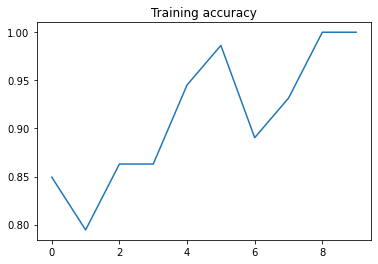

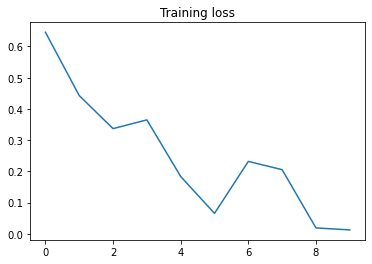

In [25]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.title('Training accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.title('Training loss')

In [52]:

test_dir = os.path.join(base_dir, 'test_dataset')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(275, 275),
        batch_size=6,
        class_mode='binary',
        shuffle=False)    #it is important to specify shuffle=False in order to preserve 
　　　　　　　　　　　　　　　#the order of filenames and predictions.


pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

# Get classes by np.round
cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames

# Data frame
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})


Found 73 images belonging to 1 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
13/13 [==============================] - 7s 577ms/step


In [53]:
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 252)

results

file        pr  class
0    test\C2_test (1).png  0.001531    0.0
1   test\C2_test (10).png  0.997354    1.0
2   test\C2_test (11).png  0.999959    1.0
3   test\C2_test (12).png  0.977359    1.0
4   test\C2_test (13).png  0.999949    1.0
5   test\C2_test (14).png  0.999806    1.0
6   test\C2_test (15).png  0.999995    1.0
7   test\C2_test (16).png  0.990164    1.0
8   test\C2_test (17).png  0.999928    1.0
9   test\C2_test (18).png  0.999998    1.0
10  test\C2_test (19).png  0.998011    1.0
11   test\C2_test (2).png  0.007321    0.0
12  test\C2_test (20).png  0.990779    1.0
13  test\C2_test (21).png  0.999994    1.0
14  test\C2_test (22).png  0.999996    1.0
15  test\C2_test (23).png  0.999837    1.0
16  test\C2_test (24).png  0.999297    1.0
17  test\C2_test (25).png  0.999947    1.0
18  test\C2_test (26).png  0.999953    1.0
19  test\C2_test (27).png  0.999987    1.0
20  test\C2_test (28).png  1.000000    1.0
21  test\C2_test (29).png  0.999975    1.0
22   test\C2_test (3).png  0.002701    0.0
23  test\C2_test (30).png  1.000000    1.0
24  test\C2_test (31).png  0.999676    1.0
25  test\C2_test (32).png  0.999949    1.0
26  test\C2_test (33).png  1.000000    1.0
27  test\C2_test (34).png  0.999999    1.0
28  test\C2_test (35).png  0.994326    1.0
29  test\C2_test (36).png  0.999945    1.0
30  test\C2_test (37).png  0.999994    1.0
31  test\C2_test (38).png  0.999303    1.0
32  test\C2_test (39).png  0.999905    1.0
33   test\C2_test (4).png  0.001800    0.0
34  test\C2_test (40).png  0.999896    1.0
35  test\C2_test (41).png  0.998769    1.0
36  test\C2_test (42).png  1.000000    1.0
37  test\C2_test (43).png  0.999998    1.0
38  test\C2_test (44).png  0.999905    1.0
39  test\C2_test (45).png  0.999998    1.0
40  test\C2_test (46).png  0.999670    1.0
41  test\C2_test (47).png  1.000000    1.0
42  test\C2_test (48).png  0.994738    1.0
43  test\C2_test (49).png  0.000025    0.0
44   test\C2_test (5).png  0.000180    0.0
45  test\C2_test (50).png  0.000784    0.0
46  test\C2_test (51).png  0.003711    0.0
47  test\C2_test (52).png  0.000416    0.0
48  test\C2_test (53).png  0.009403    0.0
49  test\C2_test (54).png  0.000086    0.0
50  test\C2_test (55).png  0.000165    0.0
51  test\C2_test (56).png  0.001487    0.0
52  test\C2_test (57).png  0.000705    0.0
53  test\C2_test (58).png  0.000324    0.0
54  test\C2_test (59).png  0.000422    0.0
55   test\C2_test (6).png  0.000126    0.0
56  test\C2_test (60).png  0.000240    0.0
57  test\C2_test (61).png  0.014585    0.0
58  test\C2_test (62).png  0.015208    0.0
59  test\C2_test (63).png  0.000233    0.0
60  test\C2_test (64).png  0.003881    0.0
61  test\C2_test (65).png  0.000241    0.0
62  test\C2_test (66).png  0.001371    0.0
63  test\C2_test (67).png  0.003009    0.0
64  test\C2_test (68).png  0.086064    0.0
65  test\C2_test (69).png  0.026618    0.0
66   test\C2_test (7).png  0.999982    1.0
67  test\C2_test (70).png  0.000093    0.0
68  test\C2_test (71).png  0.009658    0.0
69  test\C2_test (72).png  0.005682    0.0
70  test\C2_test (73).png  0.001541    0.0
71   test\C2_test (8).png  0.999991    1.0
72   test\C2_test (9).png  0.999991    1.0

In [54]:
len(results.loc[results['class'] == 1.0])

42

In [55]:
len(results.loc[results['class'] == 0])

31

In [26]:
import numpy as np
import skimage

unen_img = []
for i in range(31):
    img_path = os.path.join(train_unenthusiastic_dir, 'unenthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(275, 275))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    unen_img.append(x)

len(unen_img)

31

In [27]:
prob_of_en_on_unenIMG = []
for i in range(31):
    a = model.predict(unen_img[i])
    a = a.flatten()
    a = a.tolist()
    prob_of_en_on_unenIMG.append(a)

prob_of_en_on_unenIMG
#You have predicted class probabilities. Since you are doing binary classification. 
#You have a dense layer consisting of one unit with an activation function of the sigmoid. 
#Sigmoid function outputs a value in the range [0,1] which corresponds to 
# the probability of the given sample belonging to a positive class (i.e. class one).

#通过train_labels = train_generator.classes 查询, 
#我们知道"enthusiastic"是1 (positive class), "unenthusiastic"是0 (negative class). 

[[2.5131821530521847e-05],
 [0.0007836176664568484],
 [0.0037114203441888094],
 [0.0004160894895903766],
 [0.009402808733284473],
 [8.649329538457096e-05],
 [0.0001654857478570193],
 [0.001487061963416636],
 [0.0007048226543702185],
 [0.00032433070009574294],
 [0.0004216681409161538],
 [0.00023969622270669788],
 [0.014584777876734734],
 [0.015208476223051548],
 [0.00023297520237974823],
 [0.0038814647123217583],
 [0.00024125647905748338],
 [0.001370815560221672],
 [0.003009410575032234],
 [0.086063914000988],
 [0.026618344709277153],
 [9.338116069557145e-05],
 [0.009657994844019413],
 [0.005681781098246574],
 [0.0015405905432999134],
 [0.001530534471385181],
 [0.007321028038859367],
 [0.002700831973925233],
 [0.001800293568521738],
 [0.00017954286886379123],
 [0.00012623793736565858]]

In [28]:
en_img = []
for i in range(42):
    img_path = os.path.join(train_enthusiastic_dir, 'enthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(275, 275))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    en_img.append(x)

len(en_img)

42

In [29]:
prob_of_en_on_enIMG = []
for i in range(42):
    b = model.predict(en_img[i])
    b = b.flatten()
    b = b.tolist()
    prob_of_en_on_enIMG.append(b)

prob_of_en_on_enIMG

[[0.9999815225601196],
 [0.999990701675415],
 [0.999990701675415],
 [0.9973543882369995],
 [0.9999589920043945],
 [0.9773589968681335],
 [0.9999488592147827],
 [0.9998062252998352],
 [0.9999954700469971],
 [0.9901644587516785],
 [0.9999278783798218],
 [0.9999977350234985],
 [0.9980105757713318],
 [0.9907785654067993],
 [0.9999938011169434],
 [0.9999963045120239],
 [0.9998371601104736],
 [0.9992966651916504],
 [0.9999465942382812],
 [0.9999532699584961],
 [0.9999865293502808],
 [1.0],
 [0.999975323677063],
 [0.9999998807907104],
 [0.9996757507324219],
 [0.9999488592147827],
 [1.0],
 [0.999998927116394],
 [0.9943261742591858],
 [0.999944806098938],
 [0.9999938011169434],
 [0.9993029832839966],
 [0.9999051094055176],
 [0.9998959302902222],
 [0.9987691044807434],
 [1.0],
 [0.9999978542327881],
 [0.999904990196228],
 [0.9999978542327881],
 [0.9996700286865234],
 [1.0],
 [0.9947383999824524]]

In [30]:
unen_img_squeeze = []

for i in range(31):
    c = np.squeeze(unen_img[i], axis=0)
    unen_img_squeeze.append(c)

In [31]:
en_img_squeeze = []

for i in range(42):
    d = np.squeeze(en_img[i], axis=0)
    en_img_squeeze.append(d)

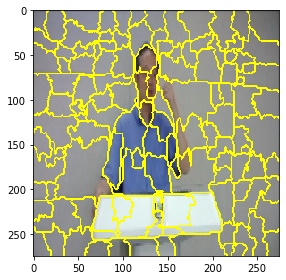

In [32]:
#Generate segmentation for image
import skimage.segmentation
import skimage.io
superpixels = skimage.segmentation.quickshift(en_img_squeeze[0], kernel_size=2.5, max_dist=250, ratio=0.5)
num_superpixels = np.unique(superpixels).shape[0]
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[0], superpixels))

In [33]:
num_superpixels

121

In [34]:
#Generate perturbations
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations.shape

(150, 121)

[1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1
 1 0 0 1 0 0 0 0 1 1]


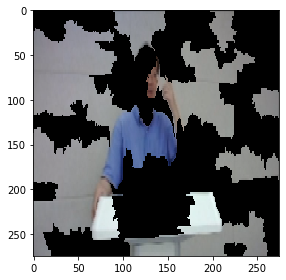

In [35]:
#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(en_img_squeeze[0],perturbations[0],superpixels))

In [36]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(en_img_squeeze[0],pert,superpixels)
  pred = model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)

(150, 1, 1)


In [37]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(150,)
(150,)


In [38]:
predictions_sq = np.squeeze(predictions, axis=1)

In [39]:
predictions_sq = np.squeeze(predictions_sq, axis=1)

In [40]:
#Estimate linear model
from sklearn.linear_model import LinearRegression
simpler_model = LinearRegression().fit(X=perturbations, y=predictions_sq, sample_weight=weights)
coeff = simpler_model.coef_

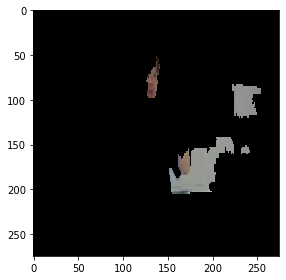

In [41]:
#Use coefficients from linear model to extract top features
num_top_features = 5
top_features = np.argsort(coeff)[-5:] #10 = num_top_features

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(en_img_squeeze[0],mask,superpixels))

In [42]:
def perturb_image2(mask, segments): 
  active_pixels = top_features
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  return mask

C = perturb_image2(mask, superpixels)
D = np.int64(C)
D

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

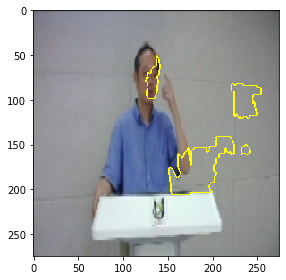

In [43]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[0], D))

In [44]:
from lime import lime_image
import time

In [45]:
explainer = lime_image.LimeImageExplainer()

In [46]:
explanation = explainer.explain_instance(en_img_squeeze[0], model, hide_color=0)

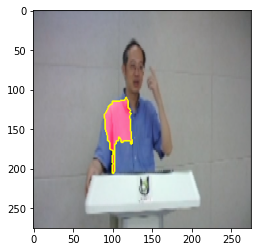

In [47]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=1, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

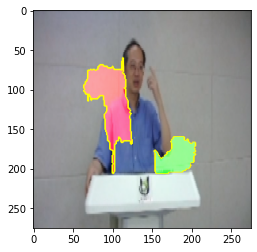

In [48]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

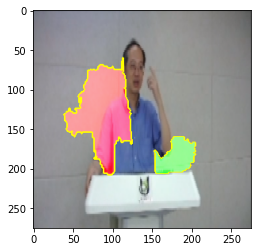

In [49]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [50]:
en_img_squeeze[0].shape #直接餵給inceptionV3_model.predict需要(batch_size, 299, 299, 3) = Xi[np.newaxis,:,:,:]
                        #餵給explainer.explain_instance只需(299, 299, 3) = Xi (非0-1 or 0-255)

(275, 275, 3)

In [68]:
prob_of_en_on_enIMG_F = [val for sublist in prob_of_en_on_enIMG for val in sublist]

top_50_idx = np.argsort(prob_of_en_on_enIMG_F)[-50:]
top_50_values = [prob_of_en_on_enIMG_F[i] for i in top_50_idx]

print(top_50_idx)
print(top_50_values)


[ 5  9 13 28 41  3 12 34 17 31 39 24  7 16 33 37 32 10 29 18 25  6 19  4
 22  0 20  2  1 30 14  8 15 11 36 38 27 23 26 21 40 35]
[0.9773589968681335, 0.9901644587516785, 0.9907785654067993, 0.9943261742591858, 0.9947383999824524, 0.9973543882369995, 0.9980105757713318, 0.9987691044807434, 0.9992966651916504, 0.9993029832839966, 0.9996700286865234, 0.9996757507324219, 0.9998062252998352, 0.9998371601104736, 0.9998959302902222, 0.999904990196228, 0.9999051094055176, 0.9999278783798218, 0.999944806098938, 0.9999465942382812, 0.9999488592147827, 0.9999488592147827, 0.9999532699584961, 0.9999589920043945, 0.999975323677063, 0.9999815225601196, 0.9999865293502808, 0.999990701675415, 0.999990701675415, 0.9999938011169434, 0.9999938011169434, 0.9999954700469971, 0.9999963045120239, 0.9999977350234985, 0.9999978542327881, 0.9999978542327881, 0.999998927116394, 0.9999998807907104, 1.0, 1.0, 1.0, 1.0]


In [69]:
a_dictionary = {}

for i in top_50_idx:
    a_dictionary['explanation%s' %i] = explainer.explain_instance(en_img_squeeze[i], model, hide_color=0)


In [70]:
from skimage.segmentation import mark_boundaries
dic_temp = {}
dic_mask = {}

for i in top_50_idx: 
    temp['temp%s' %i], mask['mask%s' %i] = a_dictionary['explanation' + str(i)].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

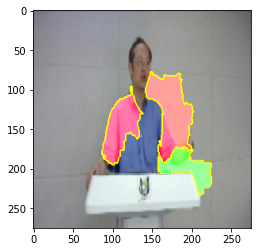

In [71]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation5'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

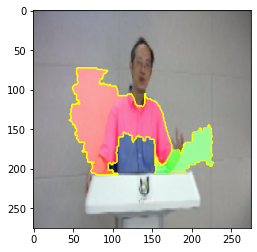

In [72]:
temp, mask = a_dictionary['explanation9'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

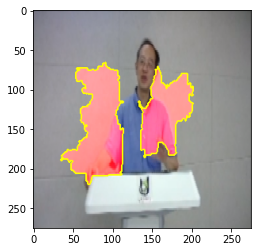

In [73]:
temp, mask = a_dictionary['explanation13'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

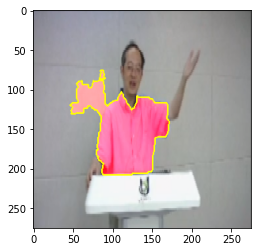

In [74]:
temp, mask = a_dictionary['explanation28'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

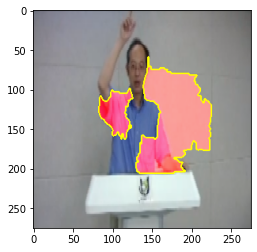

In [75]:
temp, mask = a_dictionary['explanation41'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

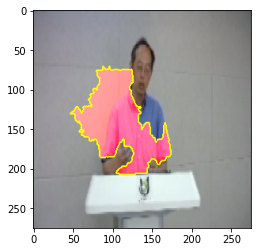

In [76]:
temp, mask = a_dictionary['explanation3'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

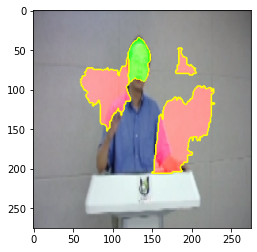

In [77]:
temp, mask = a_dictionary['explanation12'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

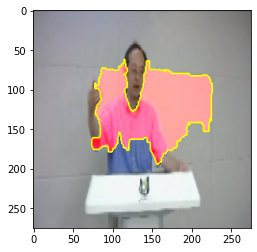

In [78]:
temp, mask = a_dictionary['explanation34'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

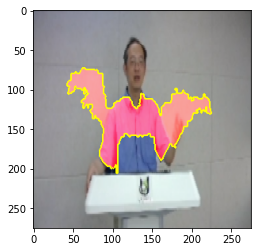

In [79]:
temp, mask = a_dictionary['explanation17'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

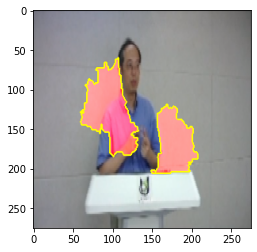

In [80]:
temp, mask = a_dictionary['explanation31'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

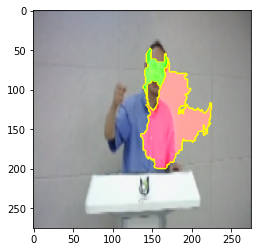

In [81]:
temp, mask = a_dictionary['explanation39'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

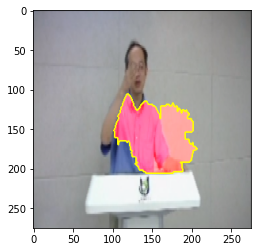

In [82]:
temp, mask = a_dictionary['explanation24'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

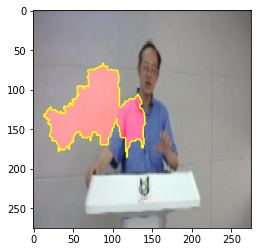

In [83]:
temp, mask = a_dictionary['explanation7'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

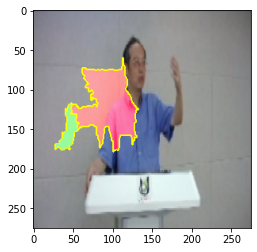

In [84]:
temp, mask = a_dictionary['explanation16'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

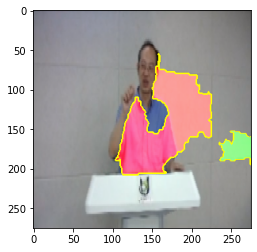

In [85]:
temp, mask = a_dictionary['explanation33'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

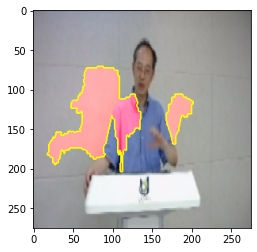

In [86]:
temp, mask = a_dictionary['explanation37'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

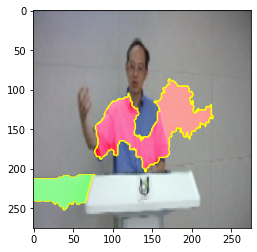

In [87]:
temp, mask = a_dictionary['explanation32'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

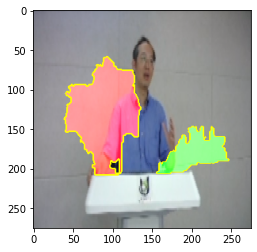

In [88]:
temp, mask = a_dictionary['explanation10'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

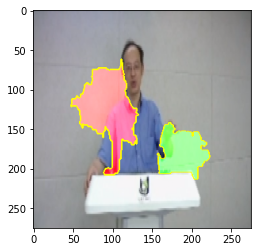

In [89]:
temp, mask = a_dictionary['explanation29'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

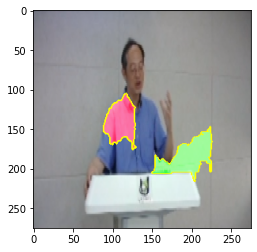

In [126]:
temp, mask = a_dictionary['explanation18'].get_image_and_mask(0, positive_only=False, num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

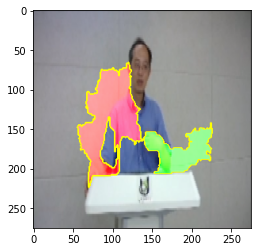

In [128]:
temp, mask = a_dictionary['explanation25'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

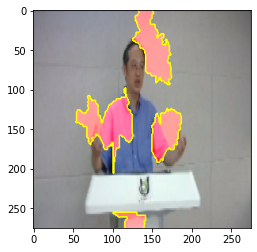

In [92]:
temp, mask = a_dictionary['explanation6'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

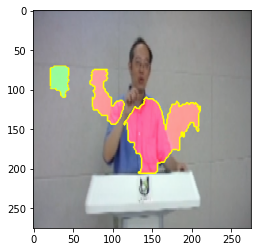

In [93]:
temp, mask = a_dictionary['explanation19'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

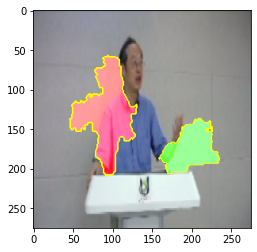

In [94]:
temp, mask = a_dictionary['explanation4'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

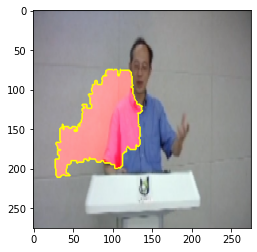

In [95]:
temp, mask = a_dictionary['explanation22'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

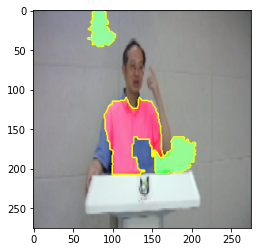

In [96]:
temp, mask = a_dictionary['explanation0'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

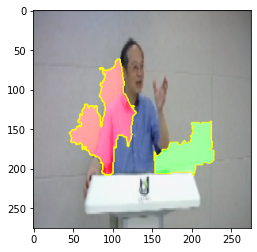

In [97]:
temp, mask = a_dictionary['explanation20'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

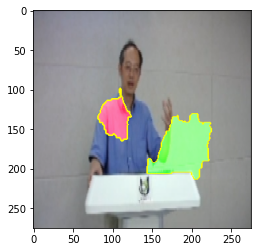

In [133]:
temp, mask = a_dictionary['explanation2'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

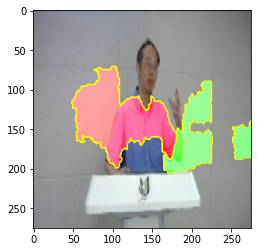

In [135]:
temp, mask = a_dictionary['explanation1'].get_image_and_mask(0, positive_only=False, num_features=8, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

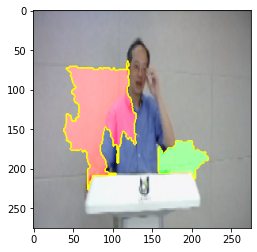

In [137]:
temp, mask = a_dictionary['explanation30'].get_image_and_mask(0, positive_only=False, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

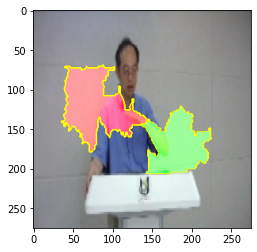

In [140]:
temp, mask = a_dictionary['explanation14'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

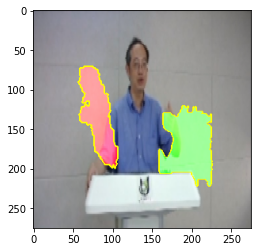

In [143]:
temp, mask = a_dictionary['explanation8'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

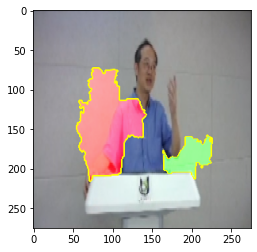

In [145]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation15'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

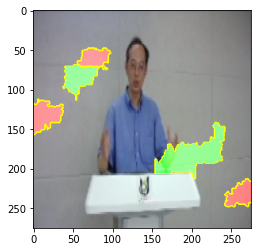

In [104]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation11'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

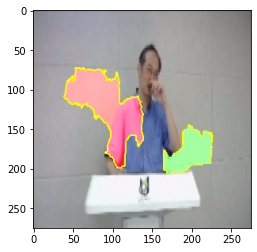

In [122]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation36'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

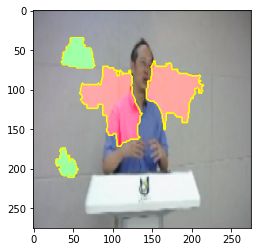

In [106]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation38'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

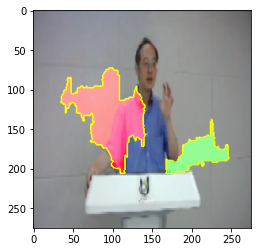

In [107]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation27'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

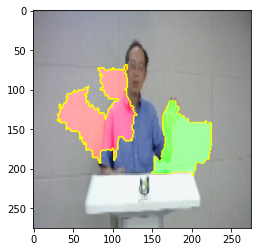

In [108]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation23'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

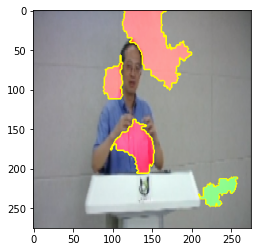

In [109]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation26'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

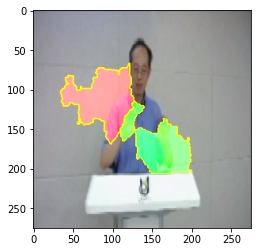

In [148]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation21'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

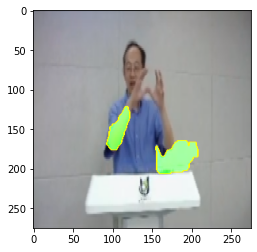

In [151]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation40'].get_image_and_mask(0, positive_only=False, num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

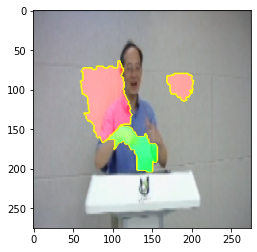

In [153]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation35'].get_image_and_mask(0, positive_only=False, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))